In [1]:
!pip install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.5.1+cu121.html

Looking in links: https://data.pyg.org/whl/torch-2.5.1+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 991.6/991.6 kB 54.5 MB/s eta 0:00:00


In [2]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 345.8 kB/s eta 0:00:00


In [3]:
!pip install pykeen

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.4/718.4 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.3 MB/s eta 0:00:00


In [4]:
import matplotlib.pyplot as plt
from torch.optim import Adam
from pykeen import predict
from pykeen.models import TransE
from pykeen.pipeline import pipeline
from pykeen.datasets import FB15k237, Nations
from pykeen.training import SLCWATrainingLoop
from pykeen.evaluation import RankBasedEvaluator
from pykeen.sampling import BasicNegativeSampler

INFO:pykeen.utils:Using opt_einsum


# With pipeline

In [5]:
res = pipeline(dataset='Nations', model='TransE', evaluator='RankBasedEvaluator')

INFO:pykeen.datasets.utils:Caching preprocessed dataset to file:///root/.data/pykeen/datasets/nations/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM
INFO:pykeen.triples.triples_factory:Stored TriplesFactory(num_entities=14, num_relations=55, create_inverse_triples=False, num_triples=1592, path="/usr/local/lib/python3.10/dist-packages/pykeen/datasets/nations/train.txt") to file:///root/.data/pykeen/datasets/nations/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/training
INFO:pykeen.datasets.base:Stored training factory to file:///root/.data/pykeen/datasets/nations/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/training
INFO:pykeen.triples.triples_factory:Stored TriplesFactory(num_entities=14, num_relations=55, create_inverse_triples=False, num_triples=201, path="/usr/local/lib/python3.10/dist-packages/pykeen/datasets/nations/test.txt") to file:///root/.data/pykeen/datasets/nations/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/testing
INFO:pykeen.datasets.base:Stored testing factory to file:///root/.data/pykeen/datase

Training epochs on cpu:   0%|          | 0/5 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Evaluating on cpu:   0%|          | 0.00/201 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.13s seconds


In [6]:
res

PipelineResult(random_seed=358182913, model=TransE(
  (loss): MarginRankingLoss(
    (margin_activation): ReLU()
  )
  (interaction): TransEInteraction()
  (entity_representations): ModuleList(
    (0): Embedding(
      (_embeddings): Embedding(14, 50)
    )
  )
  (relation_representations): ModuleList(
    (0): Embedding(
      (_embeddings): Embedding(55, 50)
    )
  )
  (weight_regularizers): ModuleList()
), training=TriplesFactory(num_entities=14, num_relations=55, create_inverse_triples=False, num_triples=1592, path="/usr/local/lib/python3.10/dist-packages/pykeen/datasets/nations/train.txt"), training_loop=<pykeen.training.slcwa.SLCWATrainingLoop object at 0x783597dc0f10>, losses=[1.3582319361822945, 1.3780180556433541, 1.2870629685265678, 1.2697546822684151, 1.270386508532933], metric_results=<pykeen.evaluation.rank_based_evaluator.RankBasedMetricResults object at 0x78359803f790>, train_seconds=2.1439120769500732, evaluate_seconds=0.13057470321655273, stopper=<pykeen.stoppers.sto

In [7]:
res.save_to_directory('results/Nations_TransE')

INFO:pykeen.triples.triples_factory:Stored TriplesFactory(num_entities=14, num_relations=55, create_inverse_triples=False, num_triples=1592, path="/usr/local/lib/python3.10/dist-packages/pykeen/datasets/nations/train.txt") to file:///content/results/Nations_TransE/training_triples
INFO:pykeen.pipeline.api:Saved to directory: /content/results/Nations_TransE


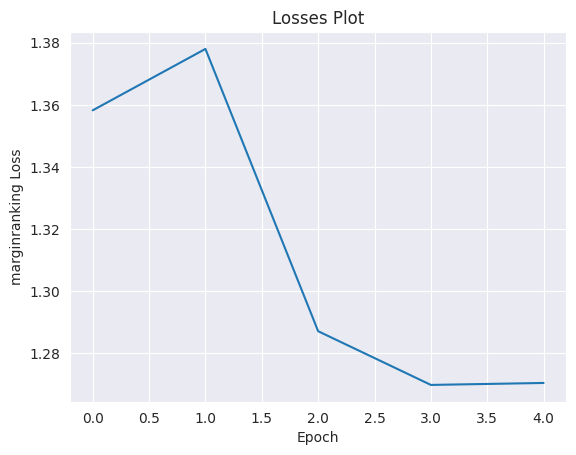

In [8]:
res.plot_losses()
plt.show()

In [9]:
res2 = pipeline(dataset=Nations,
                model=TransE,
                training_loop=SLCWATrainingLoop,
                negative_sampler=BasicNegativeSampler,
                evaluator=RankBasedEvaluator)

INFO:pykeen.datasets.utils:Loading cached preprocessed dataset from file:///root/.data/pykeen/datasets/nations/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM
INFO:pykeen.triples.triples_factory:Loading from file:///root/.data/pykeen/datasets/nations/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/training
/usr/local/lib/python3.10/dist-packages/pykeen/triples/triples_factory.py:740: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch

Training epochs on cpu:   0%|          | 0/5 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7 [00:00<?, ?batch/s]

Evaluating on cpu:   0%|          | 0.00/201 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.16s seconds


In [10]:
res2_df = res2.metric_results.to_df()

In [11]:
res2_df

,Side,Rank_type,Metric,Value
0,head,optimistic,adjusted_arithmetic_mean_rank,1.089663
1,tail,optimistic,adjusted_arithmetic_mean_rank,1.023256
2,both,optimistic,adjusted_arithmetic_mean_rank,1.055556
3,head,realistic,adjusted_arithmetic_mean_rank,1.089663
4,tail,realistic,adjusted_arithmetic_mean_rank,1.023256
...,...,...,...,...
220,tail,realistic,adjusted_hits_at_k,0.441398
221,both,realistic,adjusted_hits_at_k,0.296902
222,head,pessimistic,adjusted_hits_at_k,0.150388
223,tail,pessimistic,adjusted_hits_at_k,0.441398


# Custom

In [12]:
dataset = Nations()

In [14]:
dataset.training

TriplesFactory(num_entities=14, num_relations=55, create_inverse_triples=False, num_triples=1592, path="/usr/local/lib/python3.10/dist-packages/pykeen/datasets/nations/train.txt")

In [15]:
dataset.training.entity_id_to_label

{0: 'brazil',
 1: 'burma',
 2: 'china',
 3: 'cuba',
 4: 'egypt',
 5: 'india',
 6: 'indonesia',
 7: 'israel',
 8: 'jordan',
 9: 'netherlands',
 10: 'poland',
 11: 'uk',
 12: 'usa',
 13: 'ussr'}

In [16]:
dataset.training.relation_id_to_label

{0: 'accusation',
 1: 'aidenemy',
 2: 'attackembassy',
 3: 'blockpositionindex',
 4: 'booktranslations',
 5: 'boycottembargo',
 6: 'commonbloc0',
 7: 'commonbloc1',
 8: 'commonbloc2',
 9: 'conferences',
 10: 'dependent',
 11: 'duration',
 12: 'economicaid',
 13: 'eemigrants',
 14: 'embassy',
 15: 'emigrants3',
 16: 'expeldiplomats',
 17: 'exportbooks',
 18: 'exports3',
 19: 'independence',
 20: 'intergovorgs',
 21: 'intergovorgs3',
 22: 'lostterritory',
 23: 'militaryactions',
 24: 'militaryalliance',
 25: 'negativebehavior',
 26: 'negativecomm',
 27: 'ngo',
 28: 'ngoorgs3',
 29: 'nonviolentbehavior',
 30: 'officialvisits',
 31: 'pprotests',
 32: 'relbooktranslations',
 33: 'reldiplomacy',
 34: 'releconomicaid',
 35: 'relemigrants',
 36: 'relexportbooks',
 37: 'relexports',
 38: 'relintergovorgs',
 39: 'relngo',
 40: 'relstudents',
 41: 'reltourism',
 42: 'reltreaties',
 43: 'severdiplomatic',
 44: 'students',
 45: 'timesinceally',
 46: 'timesincewar',
 47: 'tourism',
 48: 'tourism3',


In [17]:
dataset.training.mapped_triples

tensor([[ 0,  3,  2],
        [ 0,  3,  3],
        [ 0,  3, 10],
        ...,
        [13, 54,  9],
        [13, 54, 11],
        [13, 54, 12]])

In [18]:
sample_triple = dataset.training.mapped_triples[0].detach().cpu().numpy()

In [20]:
sample_triple

array([0, 3, 2])

In [21]:
triple = [dataset.training.entity_id_to_label[sample_triple[0]],
          dataset.training.relation_id_to_label[sample_triple[1]],
          dataset.training.entity_id_to_label[sample_triple[2]]]

In [22]:
triple

['brazil', 'blockpositionindex', 'china']

In [23]:
model = TransE(triples_factory=dataset.training)

In [24]:
model

TransE(
  (loss): MarginRankingLoss(
    (margin_activation): ReLU()
  )
  (interaction): TransEInteraction()
  (entity_representations): ModuleList(
    (0): Embedding(
      (_embeddings): Embedding(14, 50)
    )
  )
  (relation_representations): ModuleList(
    (0): Embedding(
      (_embeddings): Embedding(55, 50)
    )
  )
  (weight_regularizers): ModuleList()
)

In [25]:
optimizer = Adam(params=model.get_grad_params())

In [26]:
trainer = SLCWATrainingLoop(model=model,
                            triples_factory=dataset.training,
                            optimizer=optimizer)

In [28]:
trainer.train(triples_factory=dataset.training,
              num_epochs=50,
              batch_size=64)

Training epochs on cpu:  20%|##        | 10/50 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/25 [00:00<?, ?batch/s]

[1.30623601436615,
 1.2551145458221435,
 1.3005002975463866,
 1.2682312631607056,
 1.227813663482666,
 1.1771513772010804,
 1.1762858200073243,
 1.1014042758941651,
 1.0937016248703002,
 1.0924507236480714,
 1.3748532629013062,
 1.3161353445053101,
 1.2946585416793823,
 1.2402451491355897,
 1.206087875366211,
 1.2165544319152832,
 1.1455520868301392,
 1.166733033657074,
 1.1081620144844055,
 1.1403326344490052,
 1.0714206552505494,
 1.0102115726470948,
 1.0256000471115112,
 1.01847074508667,
 1.0124206566810607,
 1.0054009222984315,
 0.9666176772117615,
 0.9570307493209839,
 0.9652211499214173,
 0.9613266444206238,
 0.9160647797584534,
 0.9265046954154968,
 0.8795473742485046,
 0.888150520324707,
 0.8703409504890441,
 0.8668421292304993,
 0.8415128564834595,
 0.8892709946632386,
 0.8558533382415772,
 0.8521849799156189,
 0.80233882188797,
 0.8129701495170594,
 0.8175938940048217,
 0.8136234140396118,
 0.8373215055465698,
 0.7880252075195312,
 0.8040125131607055,
 0.7853349161148071,
 0

In [29]:
evaluator = RankBasedEvaluator()

In [30]:
res3 = evaluator.evaluate(model=model,
                          mapped_triples=dataset.testing.mapped_triples,
                          batch_size=128,
                          additional_filter_triples=[dataset.training.mapped_triples,
                                                     dataset.validation.mapped_triples])

Evaluating on cpu:   0%|          | 0.00/201 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.10s seconds


In [31]:
res3.to_flat_dict()

{'head.optimistic.adjusted_arithmetic_mean_rank': 0.916047972587093,
 'tail.optimistic.adjusted_arithmetic_mean_rank': 0.7787993510005409,
 'both.optimistic.adjusted_arithmetic_mean_rank': 0.8455555555555557,
 'head.realistic.adjusted_arithmetic_mean_rank': 0.9160479927389775,
 'tail.realistic.adjusted_arithmetic_mean_rank': 0.7787993749842378,
 'both.realistic.adjusted_arithmetic_mean_rank': 0.8455555510520936,
 'head.pessimistic.adjusted_arithmetic_mean_rank': 0.916047972587093,
 'tail.pessimistic.adjusted_arithmetic_mean_rank': 0.7787993510005409,
 'both.pessimistic.adjusted_arithmetic_mean_rank': 0.8455555555555557,
 'head.optimistic.median_rank': 3.0,
 'tail.optimistic.median_rank': 3.0,
 'both.optimistic.median_rank': 3.0,
 'head.realistic.median_rank': 3.0,
 'tail.realistic.median_rank': 3.0,
 'both.realistic.median_rank': 3.0,
 'head.pessimistic.median_rank': 3.0,
 'tail.pessimistic.median_rank': 3.0,
 'both.pessimistic.median_rank': 3.0,
 'head.optimistic.adjusted_inverse_harm

In [32]:
res3.to_flat_dict()['both.realistic.hits_at_10']

0.9875621890547264

In [33]:
# Who do we predict brazil participates in inter-governmental organizations with?
preds = predict.predict_target(model=model,
                               head='brazil',
                               relation='intergovorgs',
                               triples_factory=dataset.training).filter_triples(dataset.testing).df

In [34]:
preds

,tail_id,score,tail_label
0,0,-7.657080,brazil
12,12,-9.396508,usa
9,9,-9.396566,netherlands
11,11,-9.837751,uk
7,7,-9.949877,israel
5,5,-10.027272,india
6,6,-10.347506,indonesia
4,4,-10.430264,egypt
2,2,-10.492867,china
13,13,-10.704515,ussr
